Quadratic Equation

In [1]:
from sympy import Symbol
#import math
from sympy import *
from sympy import plotting
from matplotlib import pyplot as plt 
import numpy as np


def quadratic_S(coefi):
  B = coefi.coeff(x,1)
  C = coefi.coeff(x,0)


  if (B**2)/4-C < 0:
    print("Entra")
    r = (-B/2) + complex(sqrt((B**2)/4-C))
    s = (-B/2) - complex(sqrt((B**2)/4-C))
  else :
    r = (-B/2)+(sqrt((B**2)/4-C))
    s = (-B/2)-(sqrt((B**2)/4-C))
  print('Po Shen loh')
  return (r,s) 

def quadratic(coefi):
  B = coefi.coeff(x,1)
  C = coefi.coeff(x,0)

  if (B**2)/4-C < 0:
    r = (-B + complex(sqrt(((B**2) - 4*C))))/2
    s = (-B - complex(sqrt(((B**2) - 4*C))))/2
  else :
    r = (-B +(sqrt((B**2)-4*C)))/2
    s = (-B -(sqrt((B**2)-4*C)))/2
  
  print('Traditional')
  return (r,s) 

x = Symbol('x')





Po Shen loh
(0, 0)
Traditional
(0, 0)


Text(0, 0.5, 'f(x)')

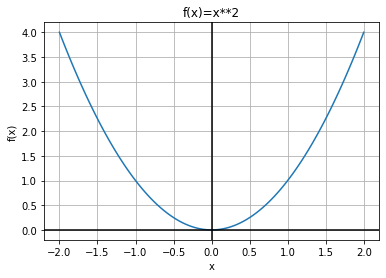

In [2]:
x = Symbol('x')
eq_1 = x**2
print(quadratic_S(eq_1))
print(quadratic(eq_1))
x = np.linspace(-2,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**2)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)='+str(eq_1))
plt.xlabel('x')
plt.ylabel('f(x)')

Po Shen loh
(1, 1)
Traditional
(1, 1)


Text(0, 0.5, 'f(x)')

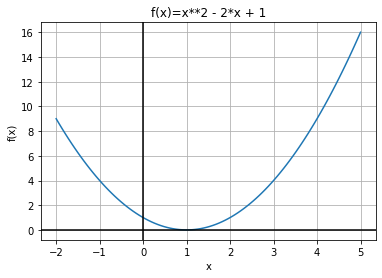

In [3]:
x = Symbol('x')
eq_2 = (x**2-2*x+1)
print(quadratic_S(eq_2))
print(quadratic(eq_2))

x = np.linspace(-2,5,100)
fig, ax = plt.subplots()
ax.plot(x,(x-1)**2)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)='+str(eq_2))
plt.xlabel('x')
plt.ylabel('f(x)')

Po Shen loh
(1, -1)
Traditional
(1, -1)


Text(0, 0.5, 'f(x)')

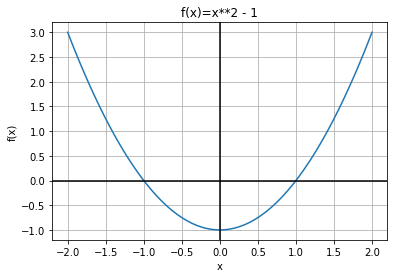

In [4]:
x = Symbol('x')
eq_3 = x ** 2 - 1
print(quadratic_S(eq_3))
print(quadratic(eq_3))

x = np.linspace(-2,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**2 -1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)='+str(eq_3))
plt.xlabel('x')
plt.ylabel('f(x)')

Entra
Po Shen loh
(1.0*I, -1.0*I)
Traditional
(1.0*I, -1.0*I)


Text(0, 0.5, 'f(x)')

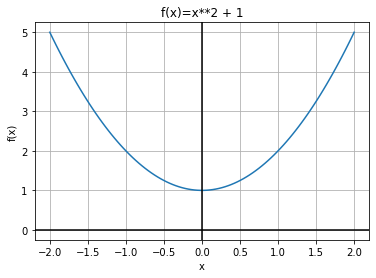

In [5]:
x = Symbol('x')
eq_4 = (x ** 2) + 1
print(quadratic_S(eq_4))
print(quadratic(eq_4))

x = np.linspace(-2,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**2 +1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)='+str(eq_4))
plt.xlabel('x')
plt.ylabel('f(x)')


## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z,case):
  if case == 1:
      return z**2
  elif case == 2:
      return (z-1) ** 2
  elif case == 3:
      return z**2 -1
  elif case == 4:    
      return z**2 + 1

def df(z,case):
  if case == 1:
      return 2*z
  elif case == 2:
      return 2*(z-1)
  elif case == 3:
      return 2*z 
  elif case == 4:
      return 2*z


def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256,r_1=0,r_2=0,case=0,e=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = e # max error allowed

    # Bounding roots
    r1 = r_1
    r2 = r_2

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z,case)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z,case) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256,r_1=0,r_2=0,case=0,e=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter,case=case,e=e)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


Text(0, 0.5, 'f(x)')

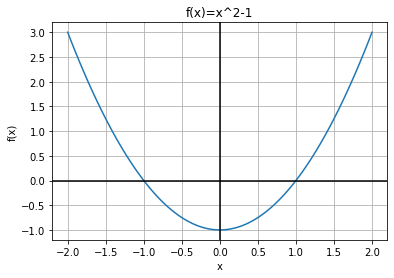

In [10]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,x**2-1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


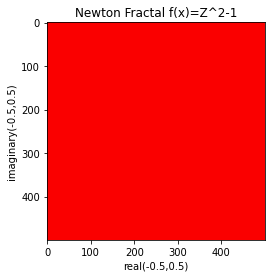

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


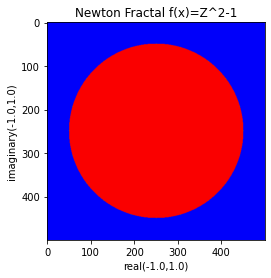

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


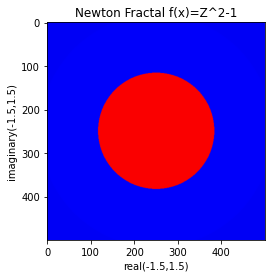

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


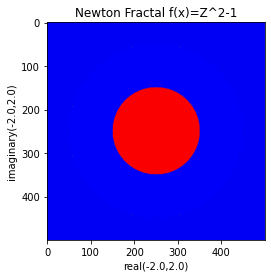

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


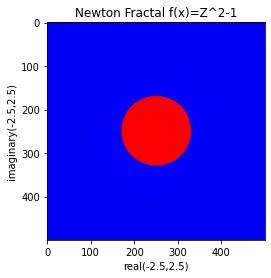

Z region from ( -3.0 , -3.0 ) to ( 3.0 , 3.0 )


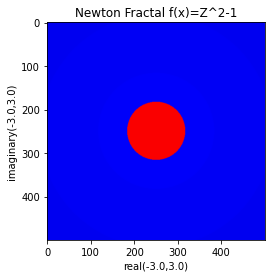

Z region from ( -3.5 , -3.5 ) to ( 3.5 , 3.5 )


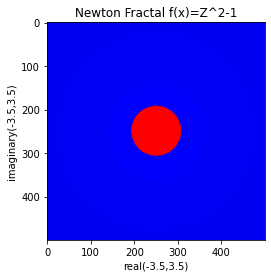

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


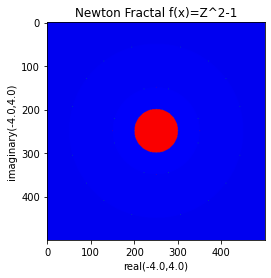

Z region from ( -4.5 , -4.5 ) to ( 4.5 , 4.5 )


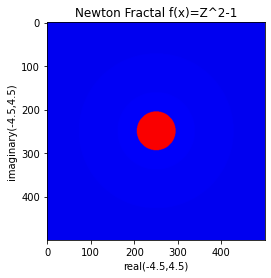

In [11]:
print("zoom out")
for i in range(1,10):
  display1(zoom=i,case=1,e=0.8)


zoom in
zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


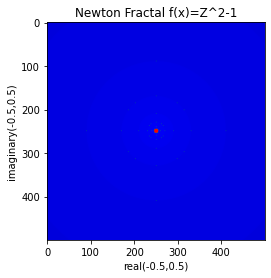

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


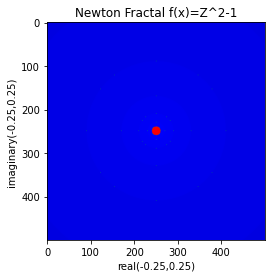

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


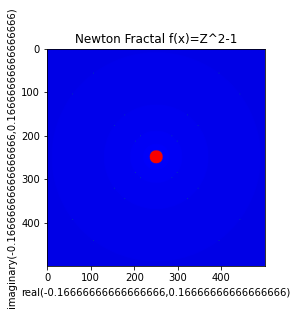

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


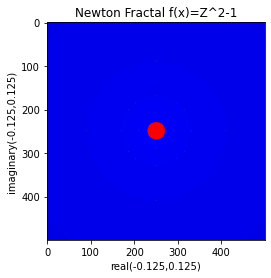

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


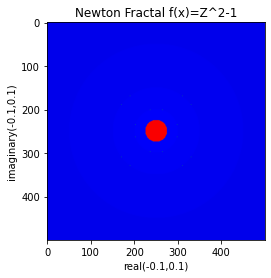

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


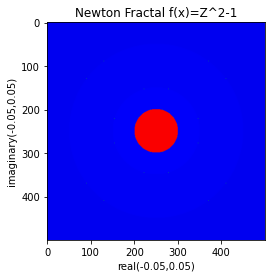

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


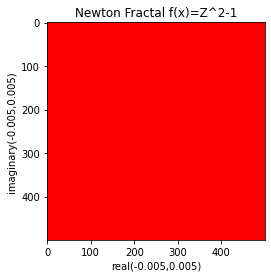

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


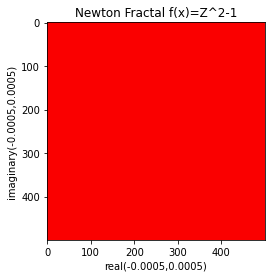

In [12]:
print("zoom in")
print("zoom out")
n = 5
for i in range(1,9):
  if i <6:
    display1(zoom=1/i,case=1,e=0.01)
  else:
    display1(zoom=1/10**(int(i-5)),case=1,e=0.01) 

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


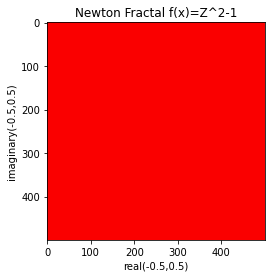

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


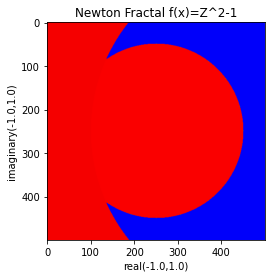

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


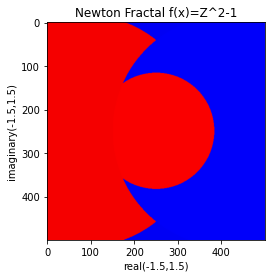

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


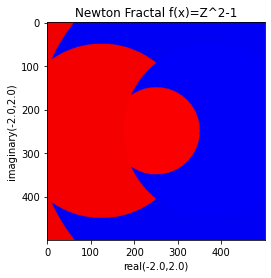

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


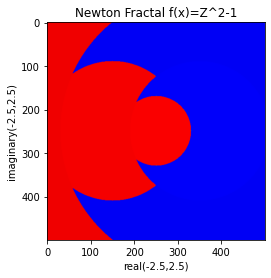

Z region from ( -3.0 , -3.0 ) to ( 3.0 , 3.0 )


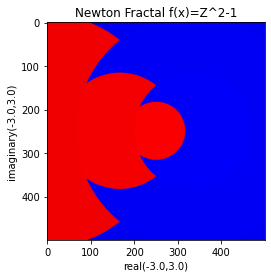

Z region from ( -3.5 , -3.5 ) to ( 3.5 , 3.5 )


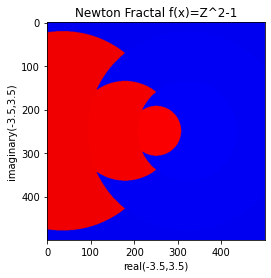

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


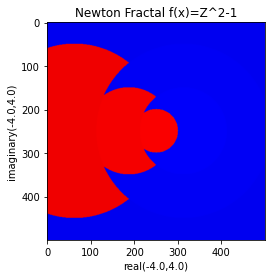

Z region from ( -4.5 , -4.5 ) to ( 4.5 , 4.5 )


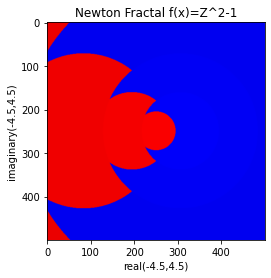

In [13]:
print("zoom out")
for i in range(1,10):
  display1(zoom=i,case=2,r_1=1,r_2=1,e=0.8)


zoom in
zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


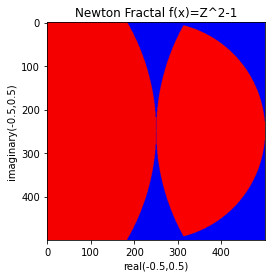

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


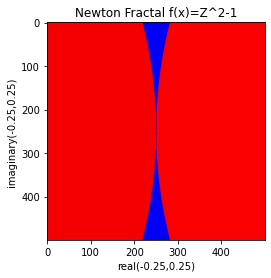

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


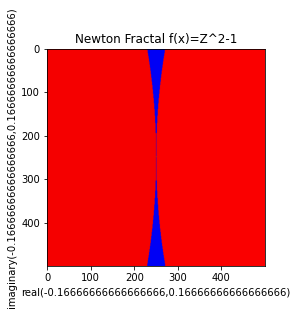

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


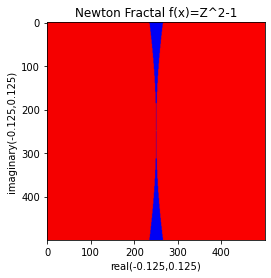

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


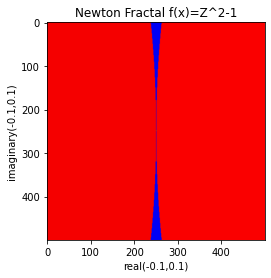

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


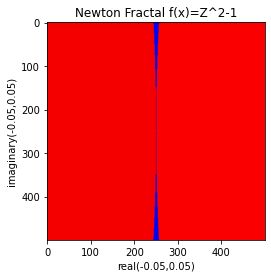

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


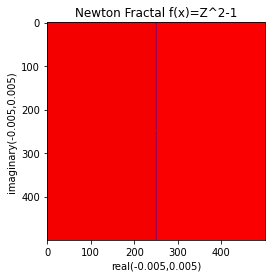

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


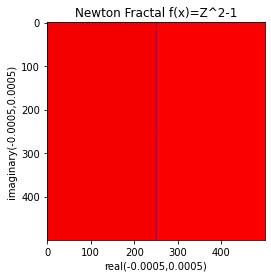

In [14]:
print("zoom in")
print("zoom out")
n = 5
for i in range(1,9):
  if i <6:
    display1(zoom=1/i,case=2,r_1=1,r_2=1,e=0.5)
  else:
    display1(zoom=1/10**(int(i-5)),case=2,r_1=1,r_2=1,e=0.5) 

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


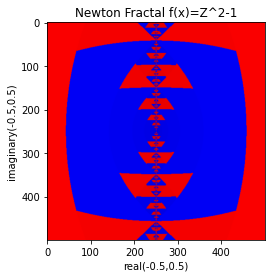

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


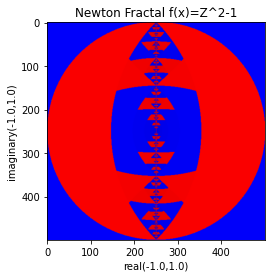

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


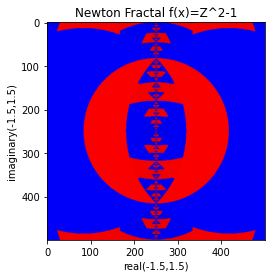

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


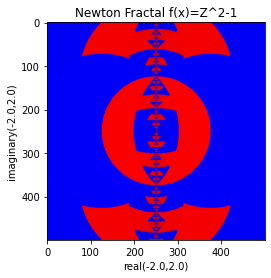

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


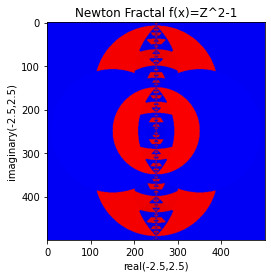

Z region from ( -3.0 , -3.0 ) to ( 3.0 , 3.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


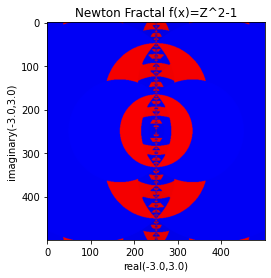

Z region from ( -3.5 , -3.5 ) to ( 3.5 , 3.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


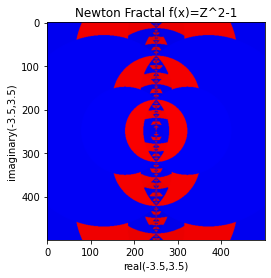

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


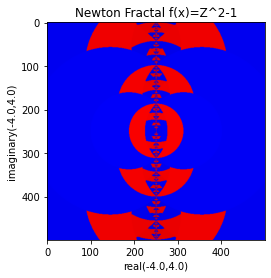

Z region from ( -4.5 , -4.5 ) to ( 4.5 , 4.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


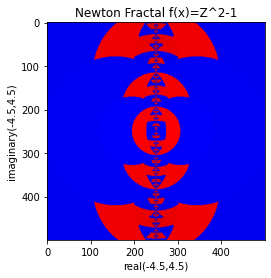

In [15]:
print("zoom out")
for i in range(1,10):
  display1(zoom=i,case=3,r_1=-1,r_2=1,e=1)


zoom in
zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


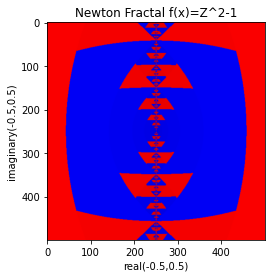

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


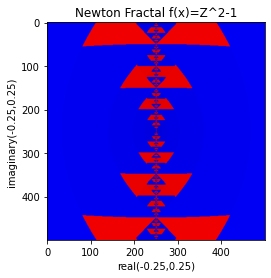

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


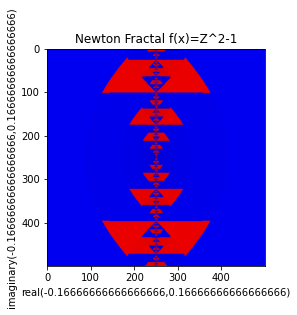

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


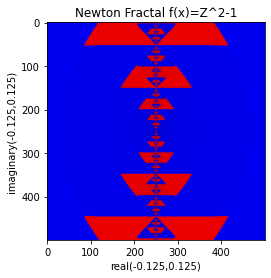

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


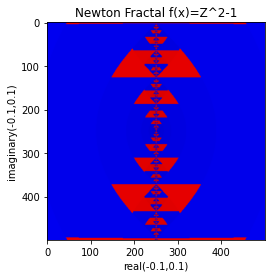

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


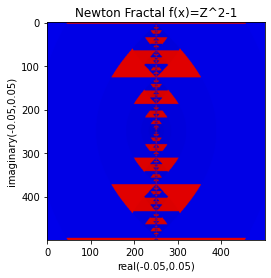

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


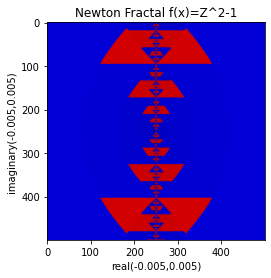

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


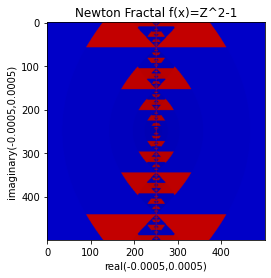

In [16]:
print("zoom in")
print("zoom out")
n = 5
for i in range(1,9):
  if i <6:
    display1(zoom=1/i,case=3,e=1)
  else:
    display1(zoom=1/10**(int(i-5)),case=3,r_1=1,r_2=1,e=1) 

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


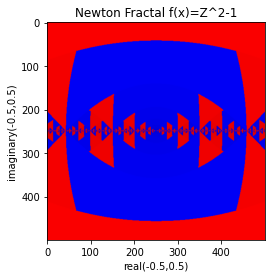

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


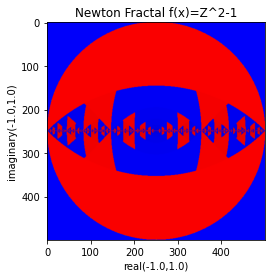

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


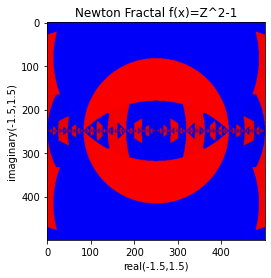

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


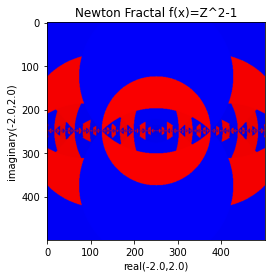

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


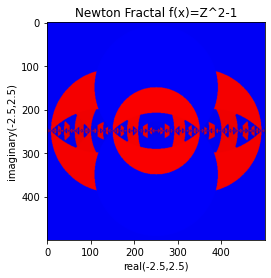

Z region from ( -3.0 , -3.0 ) to ( 3.0 , 3.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


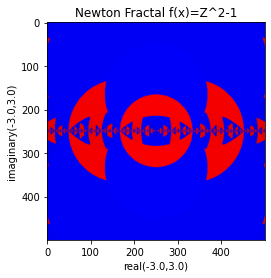

Z region from ( -3.5 , -3.5 ) to ( 3.5 , 3.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


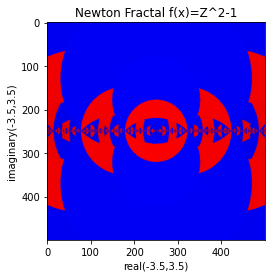

Z region from ( -4.0 , -4.0 ) to ( 4.0 , 4.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


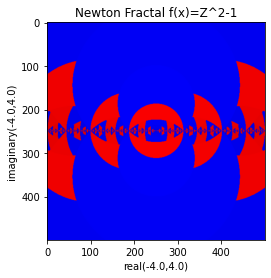

Z region from ( -4.5 , -4.5 ) to ( 4.5 , 4.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


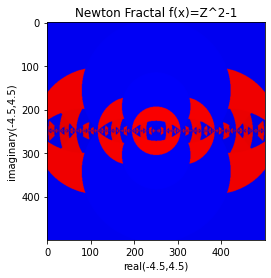

In [17]:
print("zoom out")
for i in range(1,10):
  display1(zoom=i,case=4,r_1=1,r_2=1,e=1)


zoom in
zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


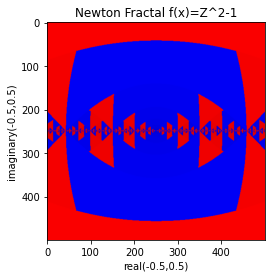

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


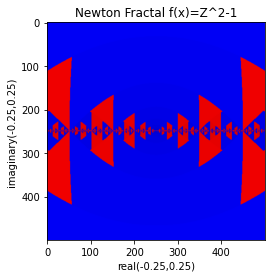

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


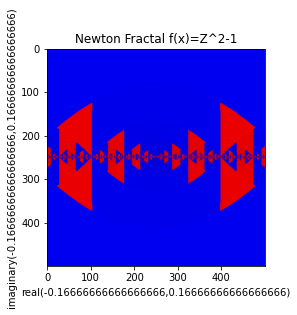

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


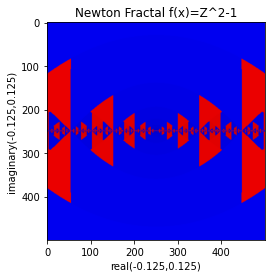

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


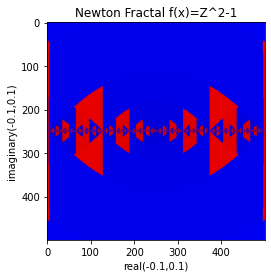

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


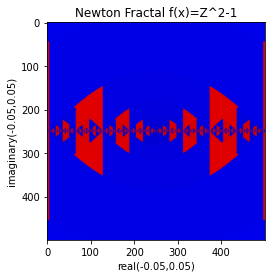

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


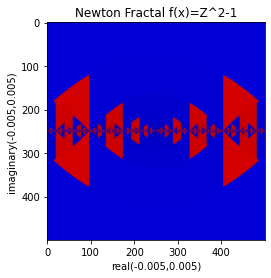

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


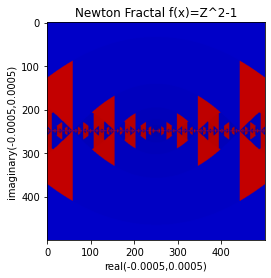

In [18]:
print("zoom in")
print("zoom out")
n = 5
for i in range(1,9):
  if i <6:
    display1(zoom=1/i,case=4,r_1=complex(1),r_2=complex(1),e=1)
  else:
    display1(zoom=1/10**(int(i-5)),case=4,r_1=complex(1),r_2=complex(1),e=1) 

## Newton iterates form z=10.0 + 0.0j

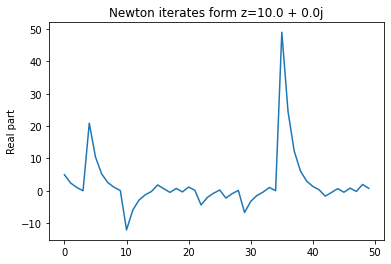

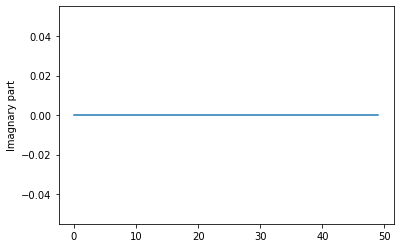

In [19]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z,4)
  z = z - f(z,4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

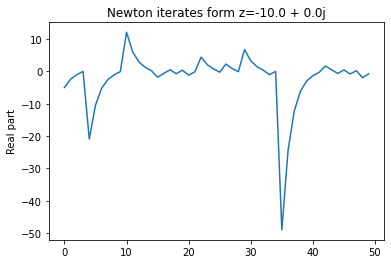

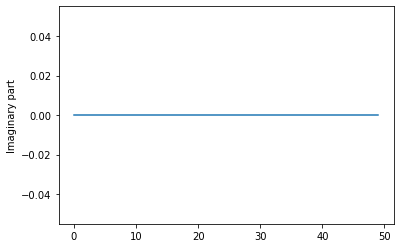

In [20]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z,4)
  z = z - f(z,4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

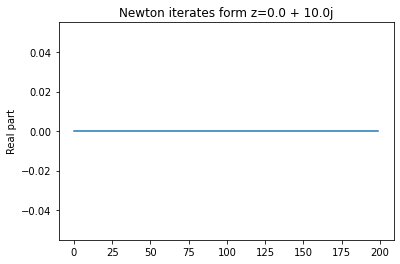

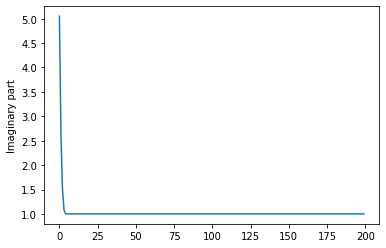

In [21]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z,4)
  z = z - f(z,4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Esta iteración z=0.0 + 10.0j no converge con esta función : 

## Newton iterates form z=0.0 - 10.0j

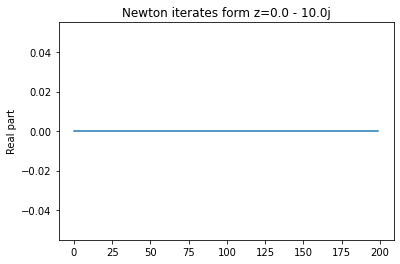

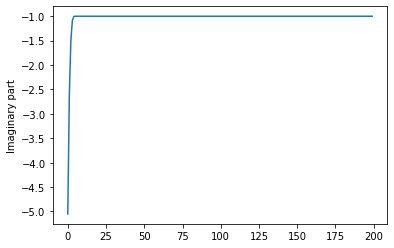

In [22]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z,4)
  z = z - f(z,4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Esta iteración z=0.0 - 10.0j tampoco converge.

## Newton iterates form z=0.0 + 0.0j

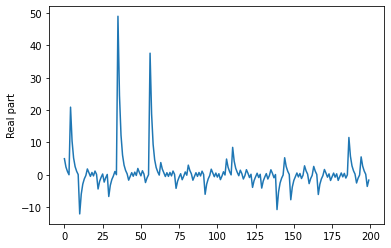

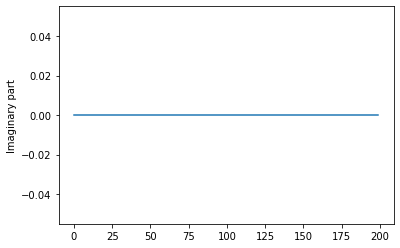

In [23]:
z=-0.1 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z,4)
  z = z - f(z,4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()